<a href="https://colab.research.google.com/github/MohannadNa/Capstone-Project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [ ]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')
training_data.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
training_data.shape

(7352, 563)

In [ ]:
testing_data.shape

(2947, 563)

In [ ]:
print('Number of NaN values in train dataset is '+str(training_data.isnull().sum().sum()))
print('Number of NaN values in test dataset is '+str(testing_data.isnull().sum().sum()))

Number of NaN values in train dataset is 0
Number of NaN values in test dataset is 0


In [ ]:
print('Number of duplicate values in train dataset is '+str(sum(training_data.duplicated())))
print('Number of duplicate values in test dataset is '+str(sum(testing_data.duplicated())))

Number of duplicate values in train dataset is 0
Number of duplicate values in test dataset is 0


In [ ]:
#The Activity column will be represented by the label y and all other columns will be represented by X
# Get X and y for training data
X_train = training_data.drop(columns = ['Activity', 'subject'])
y_train = training_data["Activity"]

# Get X and y for testing data
y_test = testing_data['Activity']
X_test = testing_data.drop(columns = ['Activity', 'subject'])

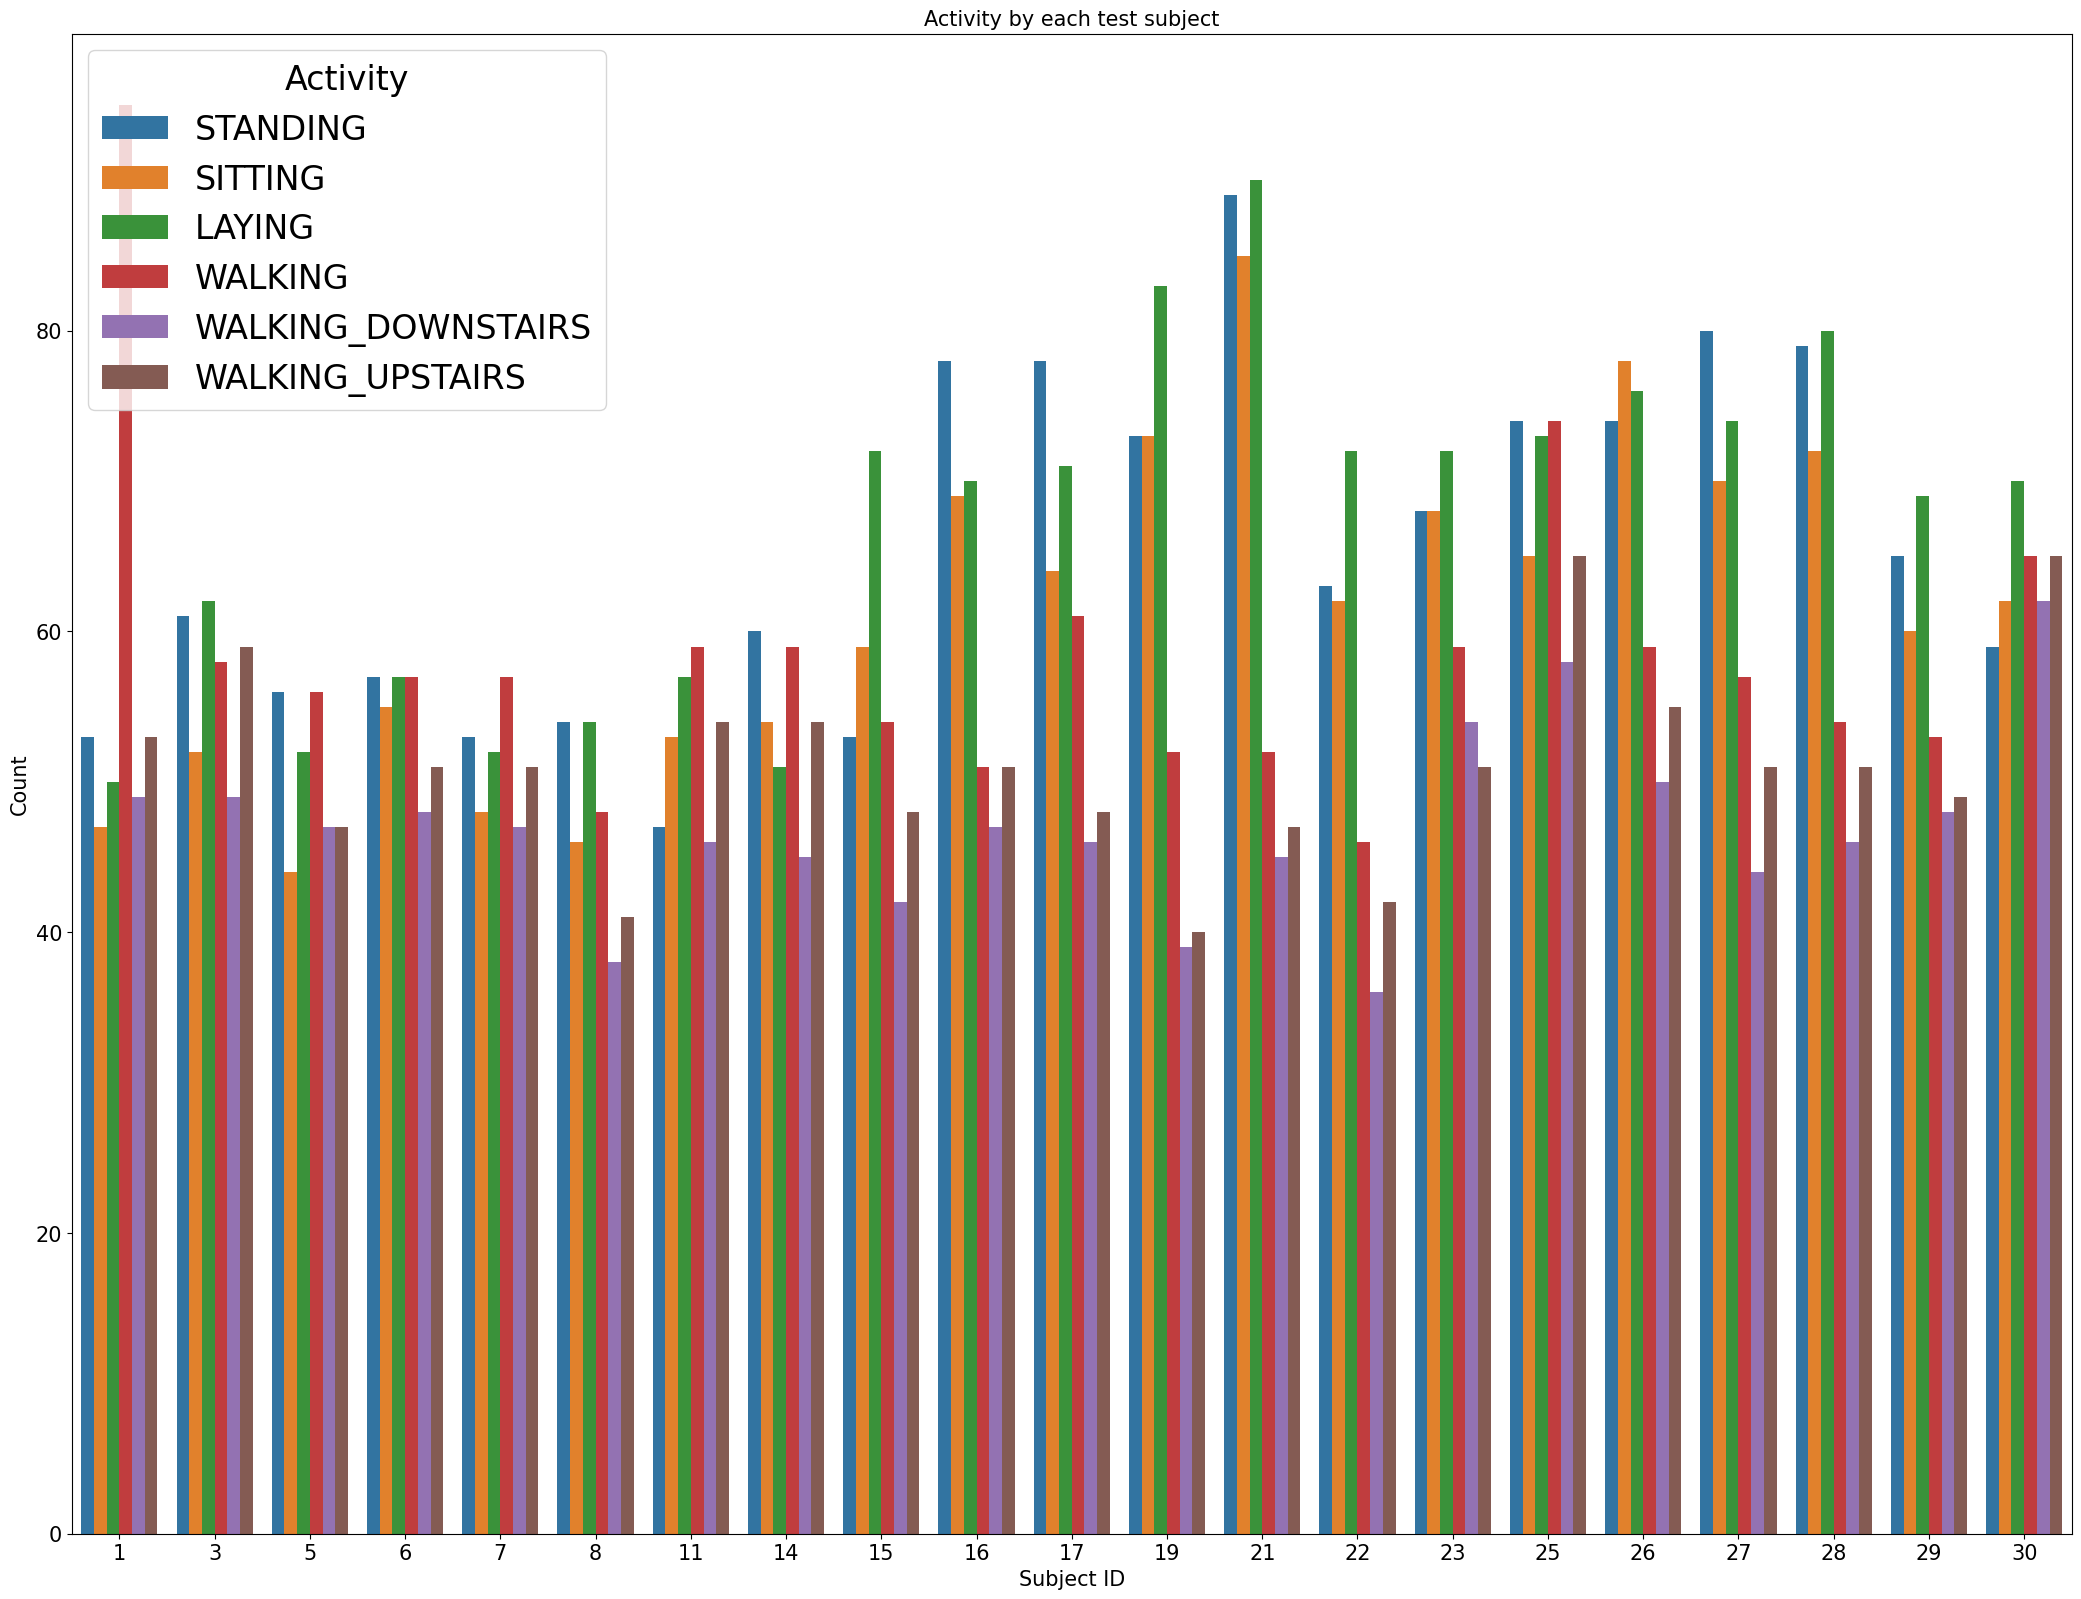

In [ ]:
#Checking for imbalance in the data
fig = plt.figure(figsize = (20,15))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Activity by each test subject', fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject", hue = 'Activity', data = training_data)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

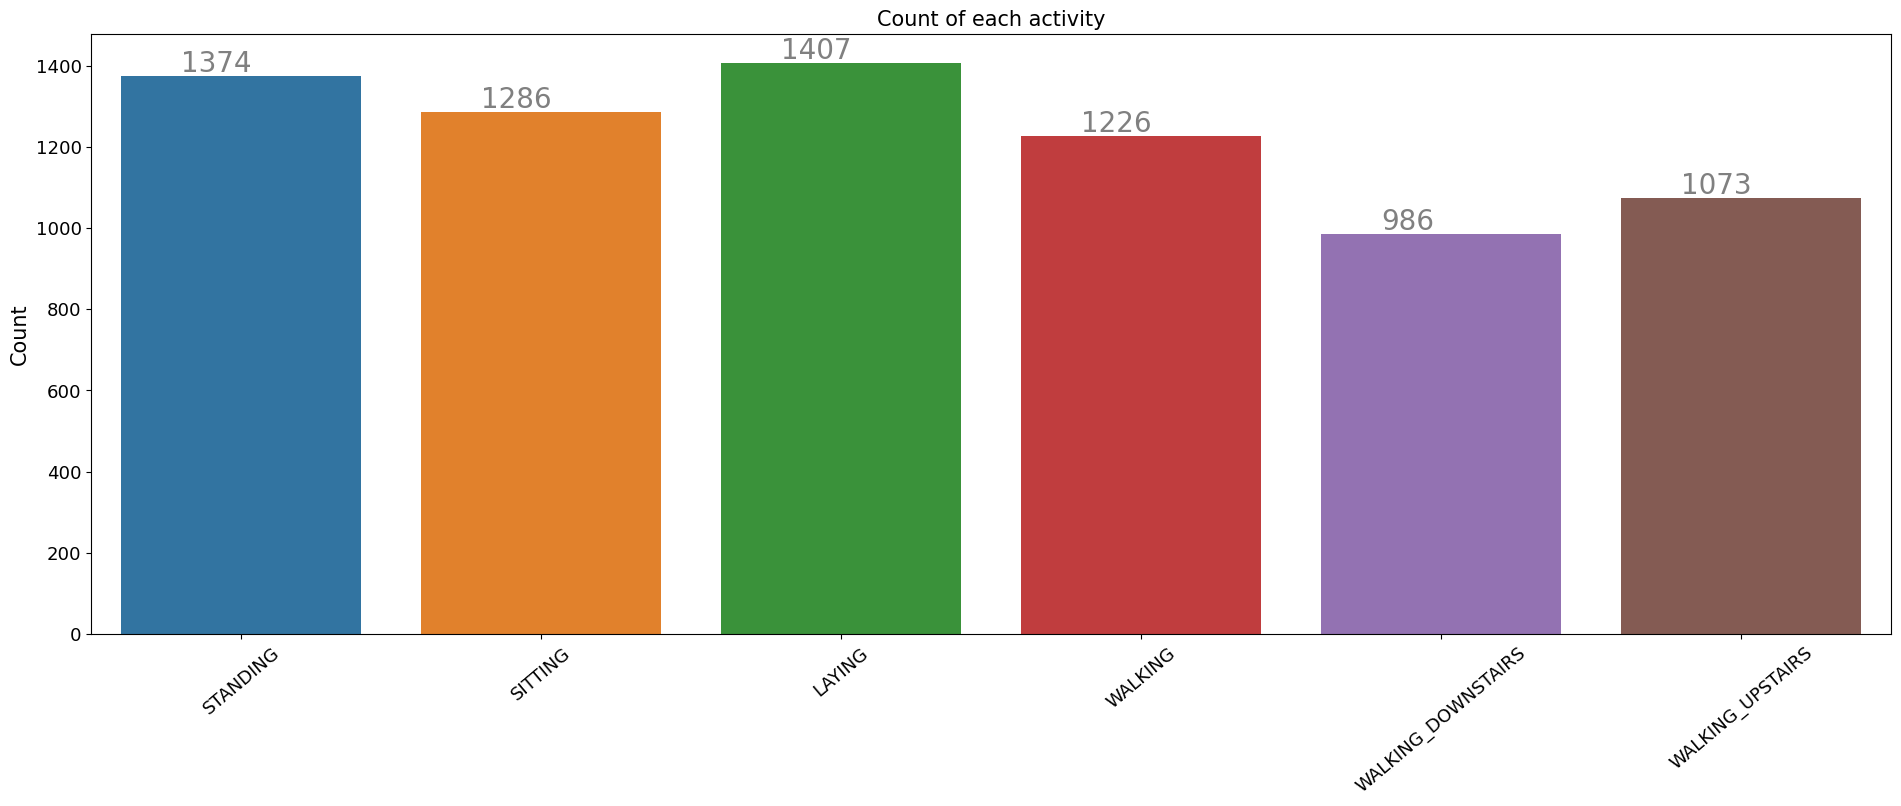

In [ ]:
count_of_each_activity = np.array(y_train.value_counts())
activities = sorted(y_train.unique())
fig = plt.figure (figsize = (18, 6)) 
ax = fig.add_axes ([0,0, 1, 1]) 
ax.set_title("Count of each activity", fontsize = 15) 
plt.tick_params (labelsize = 10)
sns.countplot(x = "Activity", data = training_data)
for i in ax.patches:    
    ax.text(x = i.get_x() + 0.2, y = i. get_height() +10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15) 
plt.tick_params (labelsize = 13) 
plt.xticks(rotation = 40) 
plt.show()

([<matplotlib.patches.Wedge at 0x19c00a74820>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

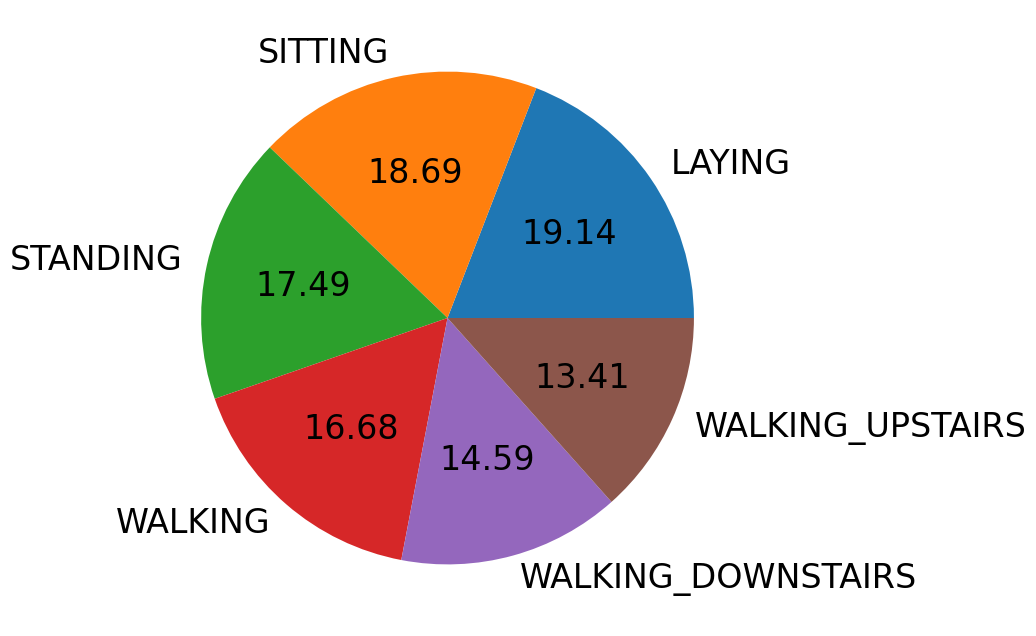

In [ ]:
plt.figure(figsize=(16,8))
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

<BarContainer object of 3 artists>

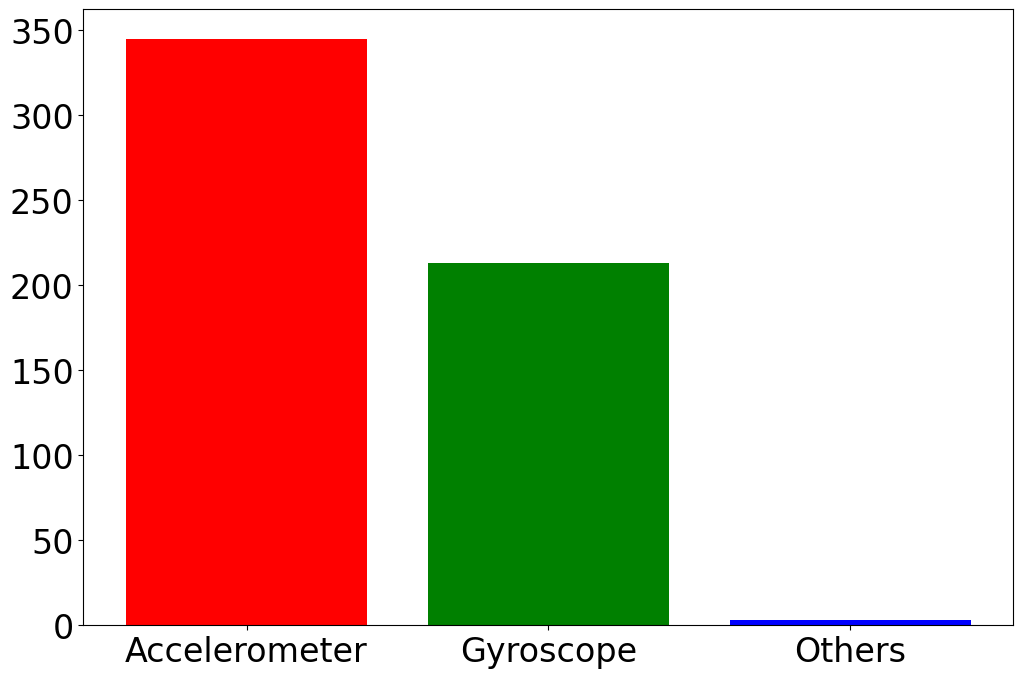

In [ ]:
Acc = 0
Gyro = 0
other = 0

for value in X_train.columns:
    if "Acc" in str(value):
        Acc += 1
    elif "Gyro" in str(value):
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(12,8))
plt.bar(['Accelerometer', 'Gyroscope', 'Others'],[Acc,Gyro,other],color=('r','g','b'))

In [ ]:
training_data['subject'].unique()
standing_activity = training_data[training_data['Activity'] == 'STANDING']
# Reset the index for this dataframe
standing_activity = standing_activity.reset_index(drop=True)
time = 1
index = 0
time_series = np.zeros(standing_activity.shape[0])
print(time_series)

[0. 0. 0. ... 0. 0. 0.]


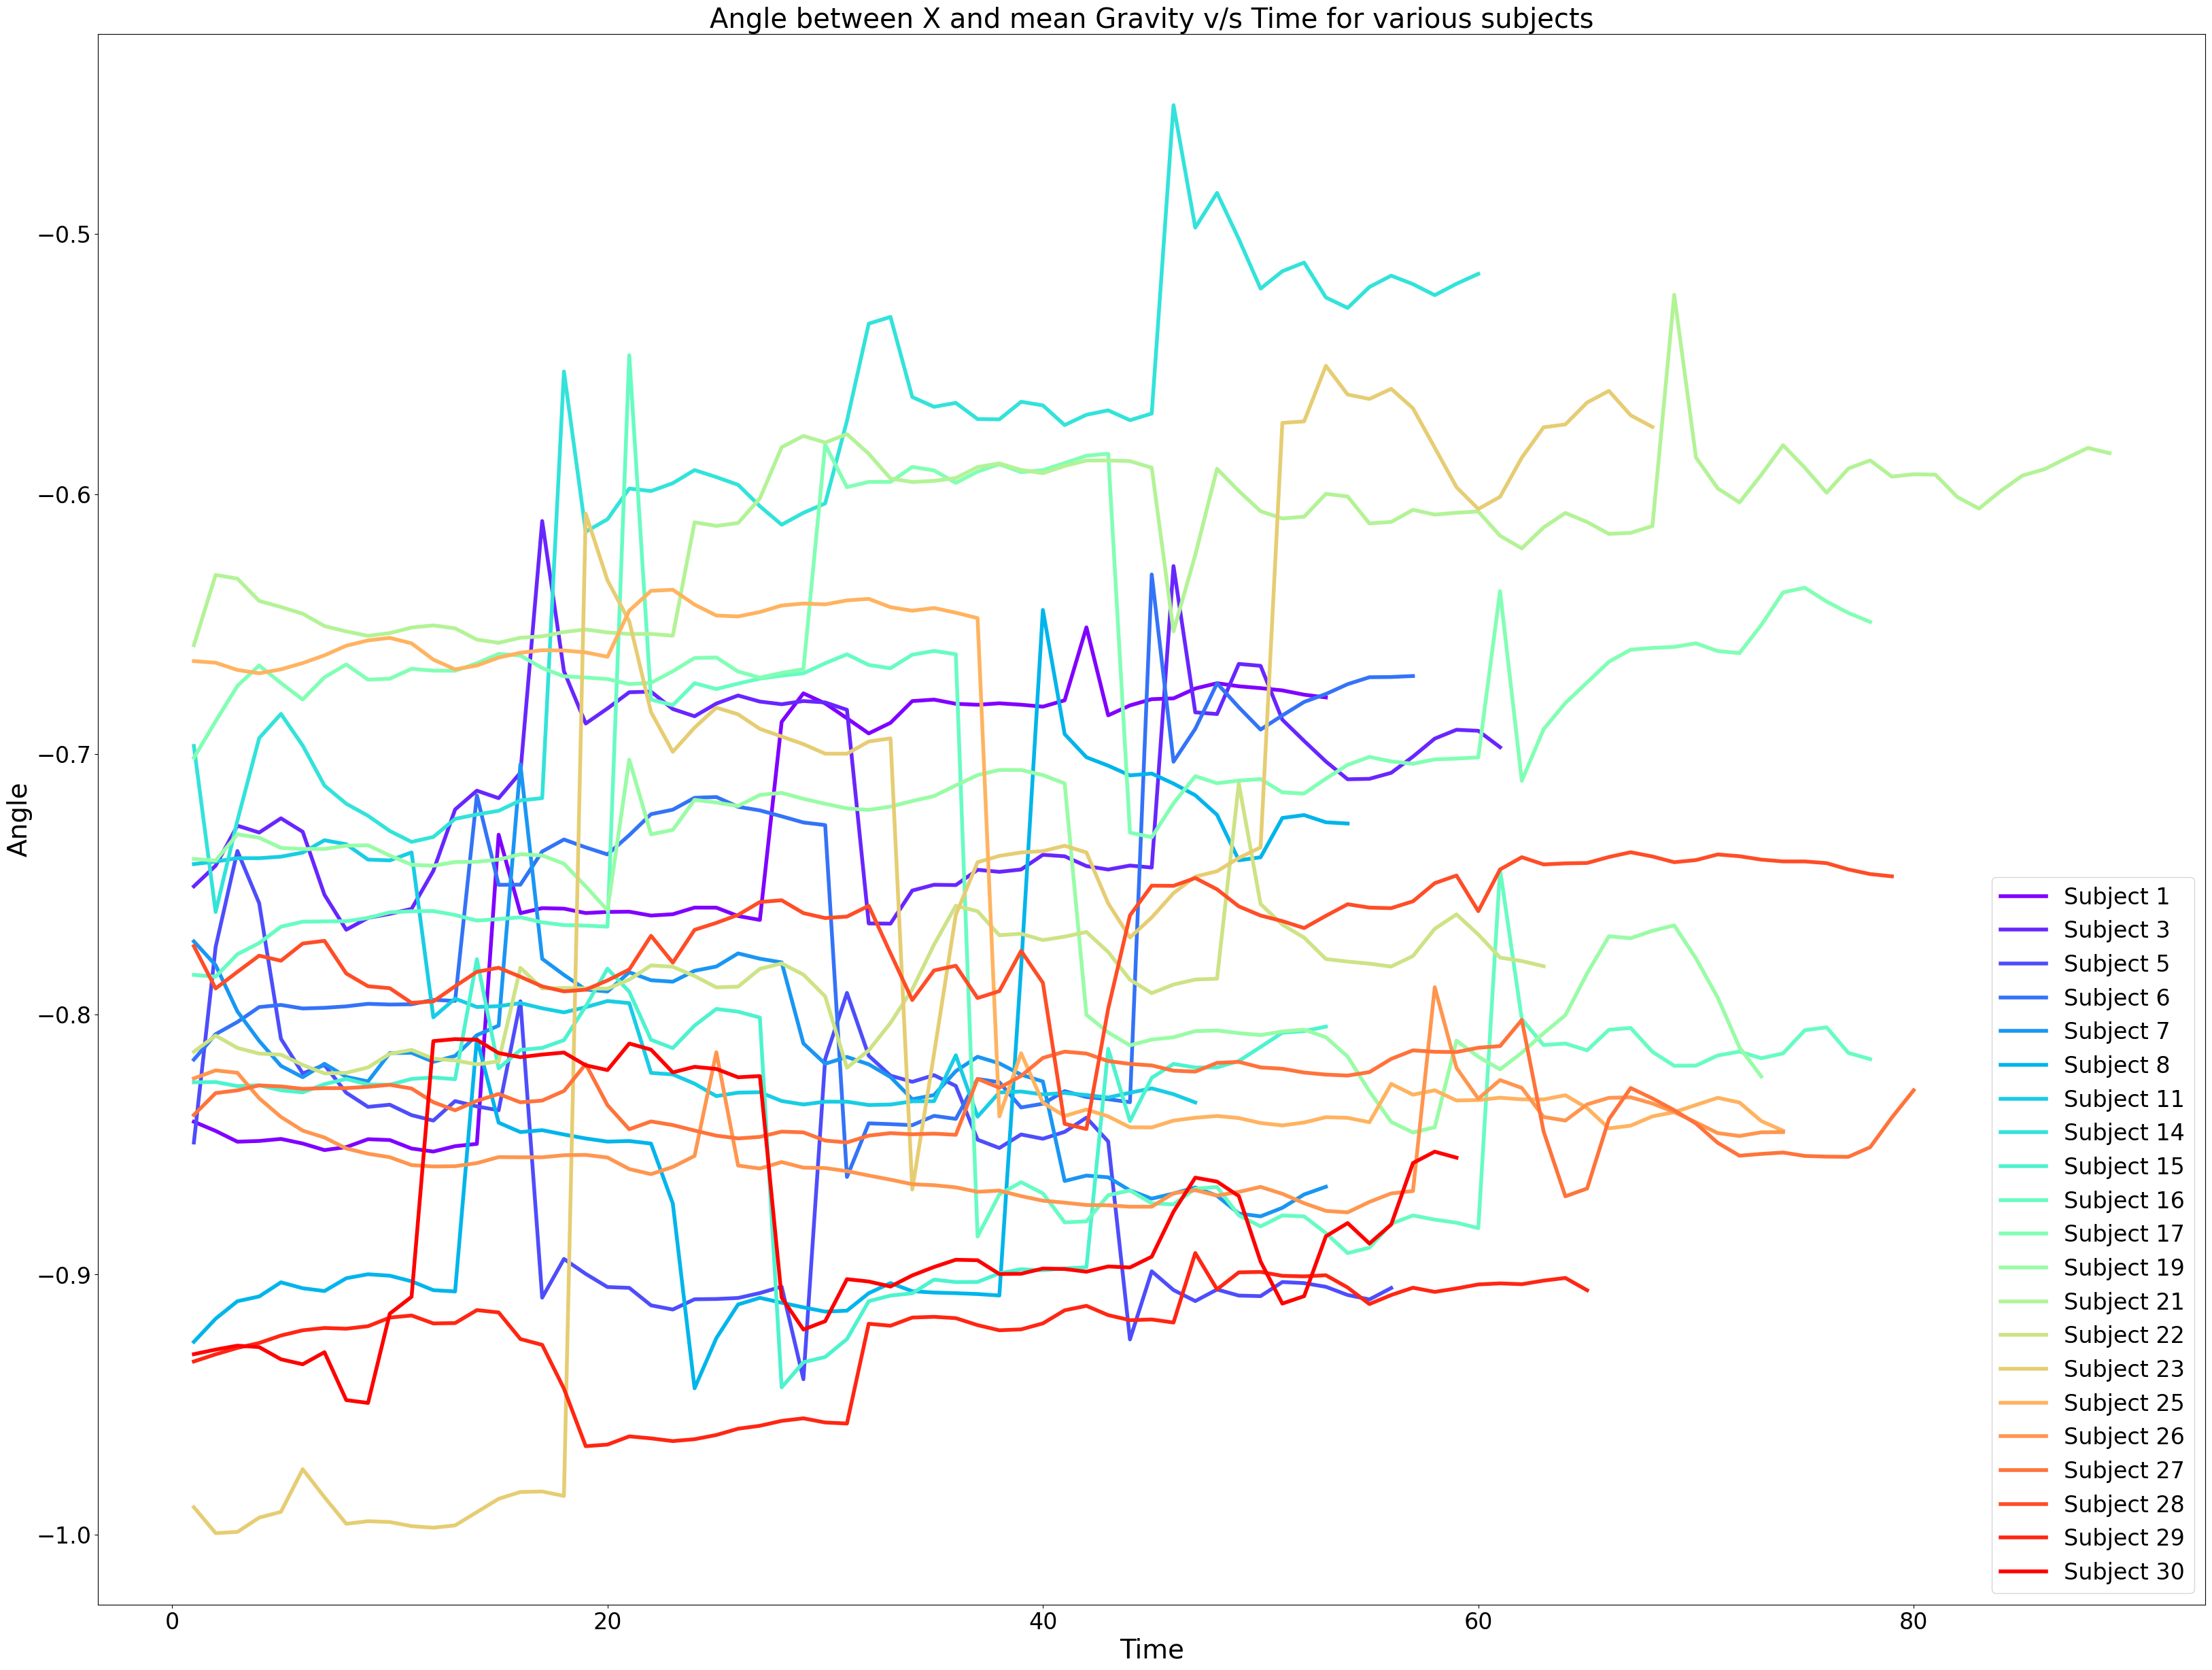

In [ ]:

for row_number in range(standing_activity.shape[0]):
    if (row_number == 0 
        or standing_activity.iloc[row_number]['subject'] == standing_activity.iloc[row_number - 1]['subject']):
        time_series[index] = time
        time += 1
    else:
        time_series[index] = 1
        time = 2
    index += 1

# Combine the time_series with the standing_activity dataframe
time_series_df = pd.DataFrame({ 'Time': time_series })
standing_activity_df = pd.concat([standing_activity, time_series_df], axis = 1)

colors = cm.rainbow(np.linspace(0, 1, len(standing_activity_df['subject'].unique())))

# Create plot for each subject, which will all be displayed overlapping on one plot
id = 0
for subject in standing_activity_df['subject'].unique():
    plt.rcParams.update({'figure.figsize': [40, 30], 'font.size': 24})
    plt.plot(standing_activity_df[standing_activity_df['subject'] == subject]['Time'], 
             standing_activity_df[standing_activity_df['subject'] == subject]['angle(X,gravityMean)'],
             c = colors[id], 
             label = 'Subject ' + str(subject),
             linewidth = 4)
    plt.xlabel('Time',fontsize=28)
    plt.ylabel('Angle',fontsize=28)
    plt.title('Angle between X and mean Gravity v/s Time for various subjects')
    plt.legend(prop = {'size': 24})
    id += 1
    


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 95.82626399728538%


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K Nearest Neighbors Classifier accuracy: 90.02375296912113%
Random Forest Classifier accuracy: 92.60264675941634%


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

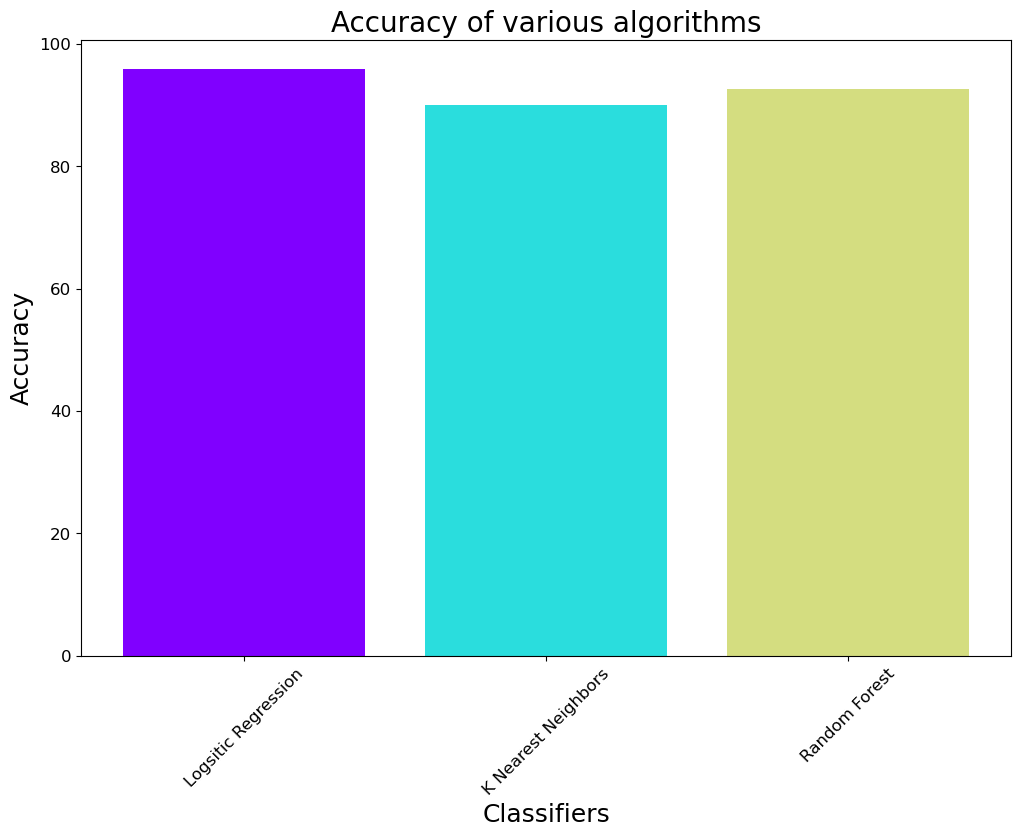

In [ ]:
accuracy_scores = np.zeros(3)


# Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[0]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[1]))

# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[2]))

plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy of various algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)